<a href="https://colab.research.google.com/github/arrears3/Projects/blob/main/FinalyearProject_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving wdbc.data to wdbc.data


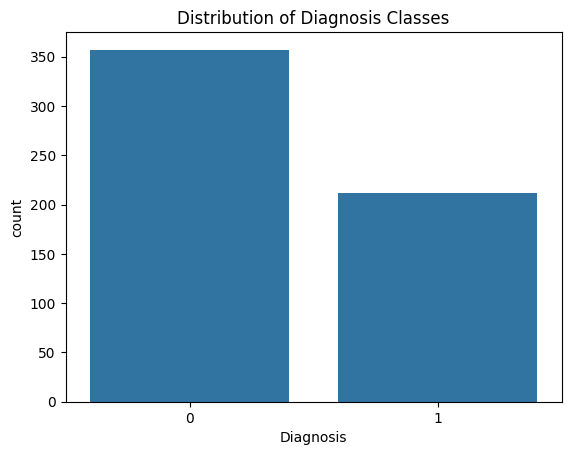

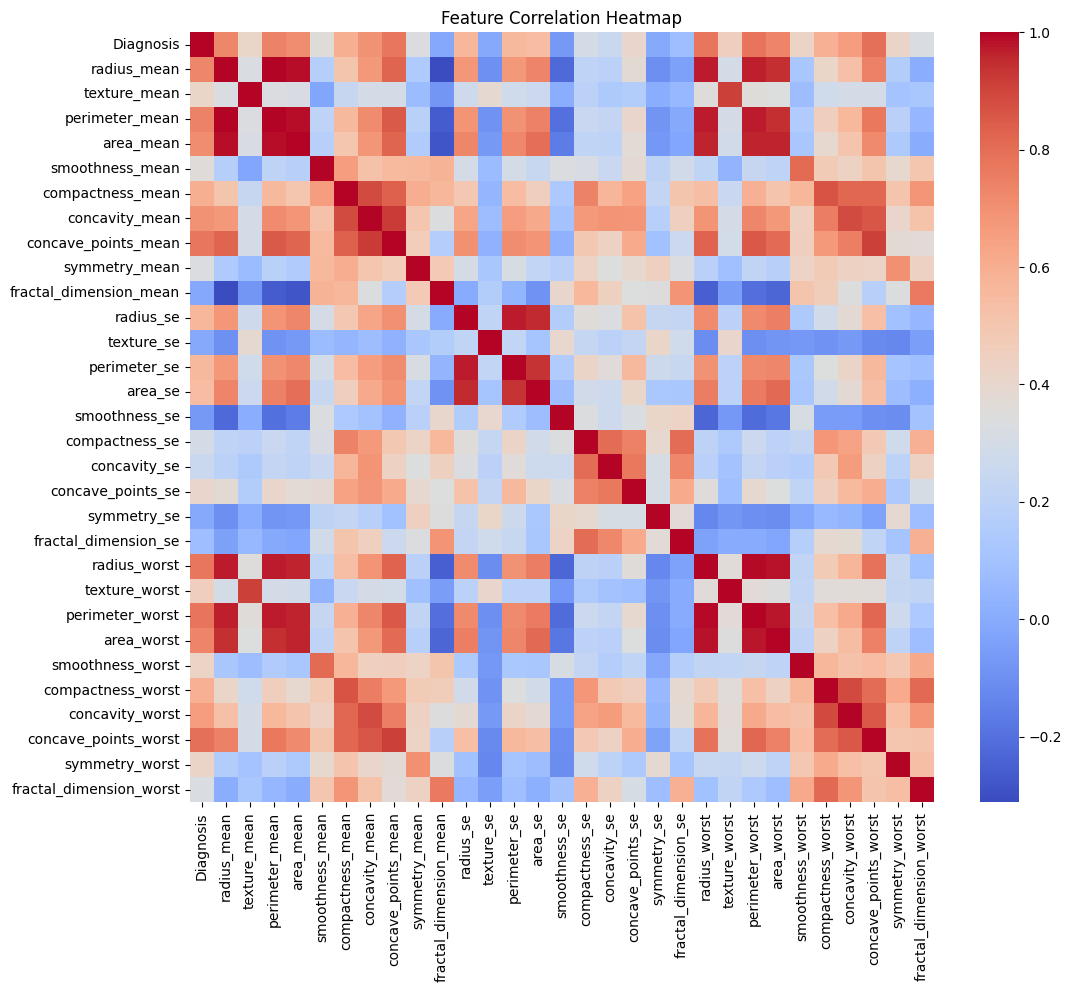

Random Forest Accuracy: 0.9708
SVM Accuracy: 0.9766
XGBoost Accuracy: 0.9708

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



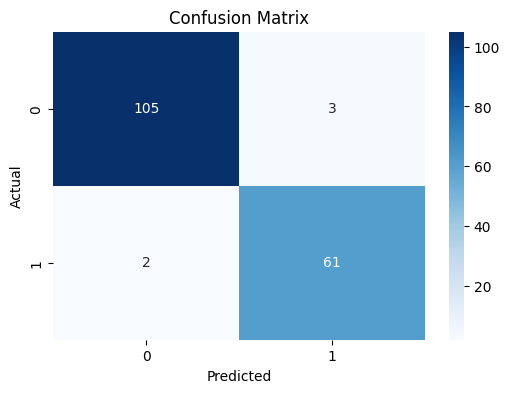

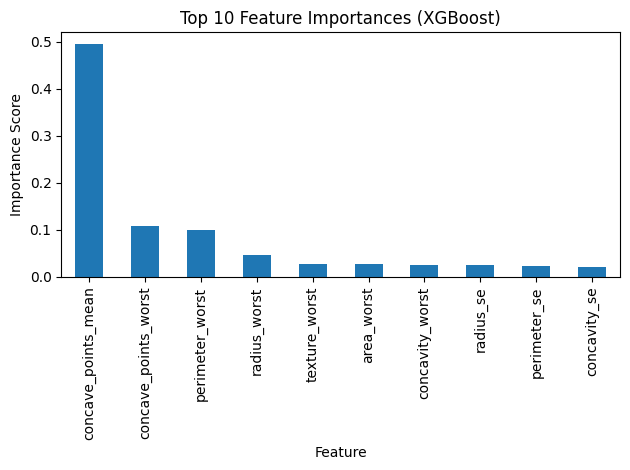

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 2: Define column names as per wdbc.names
columns = ['ID', 'Diagnosis'] + [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

# Step 3: Upload the file from local system to Colab
from google.colab import files
uploaded = files.upload()  # Upload the `wdbc.data` file when prompted

# Step 4: Load the dataset (after upload)
df = pd.read_csv('wdbc.data', header=None, names=columns)

# Step 5: Drop 'ID' column as it's not useful for prediction
df.drop('ID', axis=1, inplace=True)

# Step 6: Encode 'Diagnosis' column - M:1 (Malignant), B:0 (Benign)
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

# Step 7: Visualize class distribution
sns.countplot(x='Diagnosis', data=df)
plt.title('Distribution of Diagnosis Classes')
plt.show()

# Step 8: Visualize feature correlations
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

# Step 9: Prepare features and target variable
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Step 10: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 11: Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 12: Define models to compare
models = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(kernel='linear'),
    "XGBoost": XGBClassifier(eval_metric='logloss')
}

# Step 13: Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")

# Step 14: Choose best model (here we use XGBoost for feature importance)
best_model = XGBClassifier(eval_metric='logloss')
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Step 15: Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 16: Confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 17: Feature Importance (Top 10)
importances = best_model.feature_importances_
feat_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_df.sort_values(by='Importance', ascending=False).head(10).plot.bar(x='Feature', y='Importance', legend=False)
plt.title("Top 10 Feature Importances (XGBoost)")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()
